In [3]:
import pandas as pd
df_wine = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book/master/code/datasets/wine/wine.data', header=None)

In [16]:
'''PCAによる教師なし次元削除の実装。
PCAの目的は、高次元のデータにおいて分散が最大になる方向を見つけ元の次元以下の新しい次元に投影する'''
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler 
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

#トレーニングセットとテストデータセットに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
#平均、標準偏差を用いて標準化
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


Eigenvalues 
[ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.08414846  0.33051429  0.29595018  0.16831254  0.21432212
  0.2399553 ]


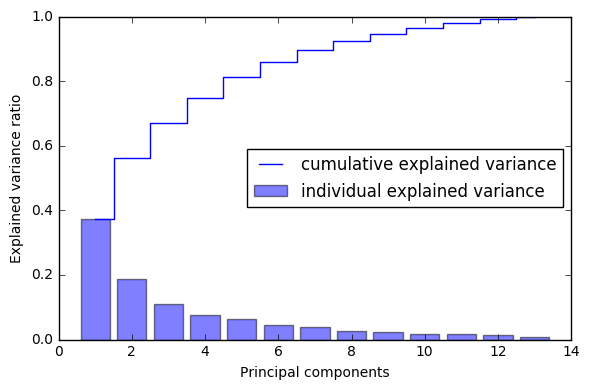

In [18]:
#共分散行列を作成する。固有ベクトルと固有ちを取得するため、linalg.eig関数を用いる
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)

#データセットを新しい特徴次元部分空間に圧縮するため、データに含まれる大半の情報を含む固有ベクトルだけ選択する。
#分散説明率の累積和をNumpy cumcumで計算
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt

plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

plt.show()
#結果より、一つ目の主成分だけで分散の40%をしめることが分かる。

In [19]:
#以上のステップで固有対（固有値と固有ベクトル）にうまく分解ができた。Wineデータを新しい主成分軸に変換する。
#ここでは、固有値の大きいものから固有対を並べ替え、選択された固有ベクトルより射影行列を生成する。

#固有値、固有ベクトルのタプルを作成
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
#タプルリストを大きいものから順に並び替え。
eigen_pairs.sort(key=lambda k:k[0], reverse=True)
#注：sortは破壊的メソッド、sortedは非破壊的メソッド。http://docs.python.jp/2/howto/sorting.html

In [21]:
#上位二つの固有ベクトルより射影行列Wが作成される。
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


In [26]:
#同様に行列の積を計算することで、124*13次元のデータセットを二つの主成分に変換できる。
X_train_pca = X_train_std.dot(w)
print(X_train_pca)

[[ 2.59891628  0.00484089]
 [ 0.15819134 -2.26659577]
 [-2.6372337   2.66488569]
 [-2.52848449  0.51846618]
 [ 1.70922581 -0.91719459]
 [-2.83057003  0.41936129]
 [-2.82251879  1.99763147]
 [ 1.36618015  0.04639099]
 [-2.46584868 -0.07932269]
 [-2.28554906 -0.40096658]
 [ 1.14246632 -2.39587633]
 [-2.28497881 -1.09274988]
 [-2.52924945  0.6477328 ]
 [ 0.169245   -1.1264982 ]
 [ 2.53088166  1.05798498]
 [-0.71596964 -2.80365836]
 [ 2.46922033 -0.15871191]
 [-0.58044574 -0.69290749]
 [ 0.54583852  0.41042188]
 [ 3.5604963   1.42561284]
 [ 1.58679826 -1.51260121]
 [ 2.54872139 -0.05280515]
 [-3.59338727  0.88321901]
 [-1.60406659  2.40373662]
 [ 1.48668426 -1.40863724]
 [ 0.00830468 -2.04898307]
 [-0.15646658 -2.80278355]
 [-2.39863877  2.47524175]
 [-3.13549157 -0.29421321]
 [ 3.30221023  0.40939296]
 [-3.53069904  1.79971521]
 [-0.45566459 -2.61242833]
 [-0.58840115 -1.98301934]
 [-1.16637216 -0.83784744]
 [ 1.03763587 -1.37755233]
 [ 1.95890184 -1.62578024]
 [ 2.76990407  1.86073384]
 

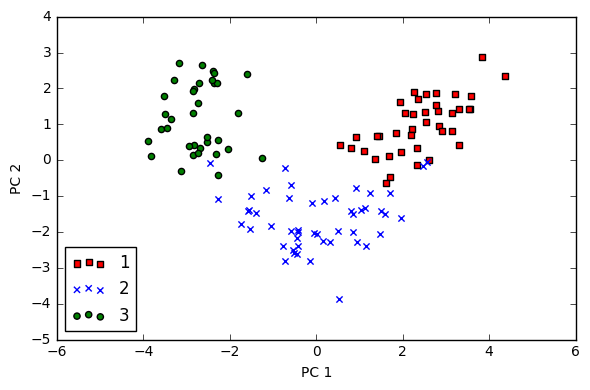

In [24]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()

plt.show()

In [27]:
#scikit-learnのPCAを利用した主成分分析
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([ 0.37329648,  0.18818926,  0.10896791,  0.07724389,  0.06478595,
        0.04592014,  0.03986936,  0.02521914,  0.02258181,  0.01830924,
        0.01635336,  0.01284271,  0.00642076])

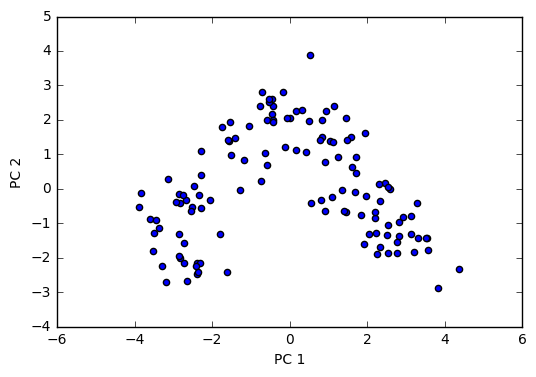

In [30]:
#主成分数を指定してPCAのインスタンスを生成
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [35]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

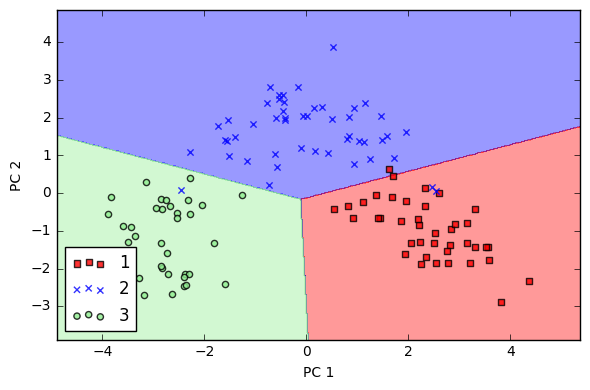

In [36]:
from sklearn.linear_model import LogisticRegression

#ロジスティック回帰のインスタンスを生成。
lr = LogisticRegression()
#PCAインスタンスを作成。トレーニングデータおよびテストデータをPCAに適合させる。
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
#トレーニングデータをロジスティック回帰に適合させる。
lr = lr.fit(X_train_pca, y_train)

plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()

plt.show()

In [38]:
'''線形判別分析による教師ありデータの圧縮
LDA、クラスの分離を最適化する特徴部分空間を見つけ出そうとする。LDAは教師ありのアルゴリズム。
ただし各クラスを構成するさんぷるの個数がごく少ない場合はPCAによる前処理の方がすぐれていることもある。
'''
#変動行列の計算
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis = 0))
    print('MV %s: %s\n' % (label, mean_vecs[label - 1]))

MV 1: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]

MV 2: [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]

MV 3: [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]



In [39]:
#平均ベクトルを使ってクラス内変動行列S_wを計算する。
d = 13 #特徴量の個数
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        #shape, reshapeについて->http://naoyat.hatenablog.jp/entry/2011/12/29/021414
        class_scatter += (row-mv).dot((row- mv).T)
    S_W += class_scatter
print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 13x13


In [40]:
#実際には変動行列の作成の前にスケーリングが必要。共分散行列を作成する。
d = 13
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0],
                                                     S_W.shape[1]))
#これでスケーリングされたクラス内変動行列が作成できる。

Scaled within-class scatter matrix: 13x13


In [41]:
#クラス感変動行列S_Bを作成する。
#mean_overallは全てのクラスのサンプルを対象として計算される全体平均
mean_overall = np.mean(X_train_std, axis=0)
d = 13 
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1) 
    mean_overall = mean_overall.reshape(d, 1) 
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13x13


In [42]:
#新しい特徴部分空間の整形判別の選択
#行列S_w-1S_bの一般化された固有値問題を解く。
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B)) #inv = inverse matrix

In [43]:
# eigenvalue, eigenvectorのタプルのリストを作る
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]
#作ったタプルを大きいものから降順に並べ替える
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in decreasing order:

452.721581245
156.43636122
7.20678700076e-14
3.94081990073e-14
3.94081990073e-14
2.51053275902e-14
2.46878288879e-14
2.46878288879e-14
1.97651922798e-14
5.31966277392e-15
3.27314649699e-15
2.7136147327e-15
0.0


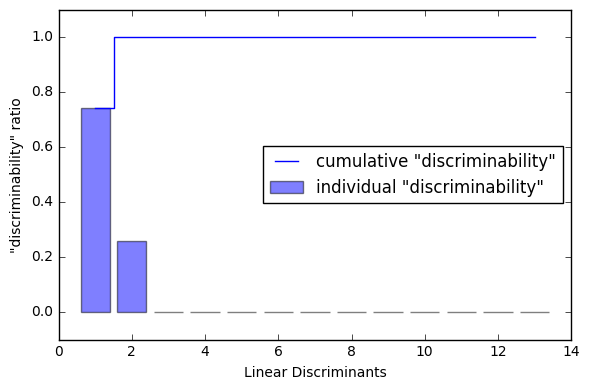

In [44]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, alpha=0.5, align='center',
        label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid',
         label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()

plt.show()
#最初の二つの線形判別はトレーニングデータセット内の有益な情報をほぼ100%補足している。

In [45]:
#もっとも判別力のある二つの固有ベクトルを列方向に並べて変換行列を作成する。
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
#np.hstack = stack arrays in sequence horizontally(https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html)
print('Matrix W:\n', w)

Matrix W:
 [[-0.0662 -0.3797]
 [ 0.0386 -0.2206]
 [-0.0217 -0.3816]
 [ 0.184   0.3018]
 [-0.0034  0.0141]
 [ 0.2326  0.0234]
 [-0.7747  0.1869]
 [-0.0811  0.0696]
 [ 0.0875  0.1796]
 [ 0.185  -0.284 ]
 [-0.066   0.2349]
 [-0.3805  0.073 ]
 [-0.3285 -0.5971]]


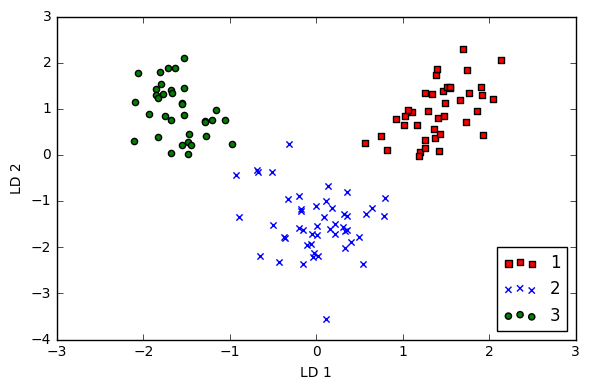

In [46]:
#新しい特長空間にサンプルを射影する。

#標準化したトレーニングデータに変換行列をかける。
X_train_lda = X_train_std.dot(w)

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0] * (-1),
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('./figures/lda2.png', dpi=300)
plt.show()
#新しい特長部分空間では、3つのクラスが完全に線形分離可能となる。

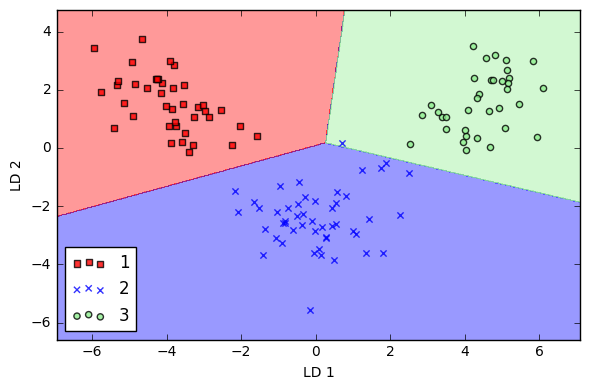

In [49]:
#scikit-learnによるLDA
from sklearn.lda import LDA
lda = LDA(n_components = 2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()

plt.show()

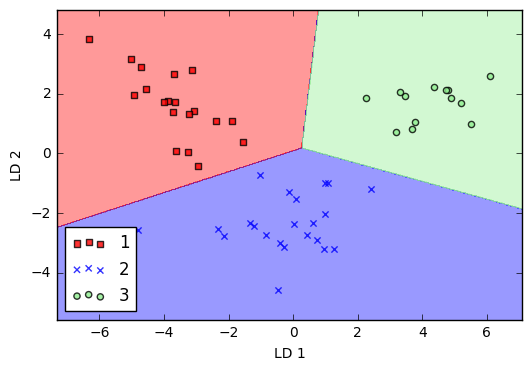

In [50]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')

plt.show()

In [3]:
'''カーネル関数とカーネルトリック
非線形問題を解くには、より高い次元の新しい特長空間に射影し、そこで線形分離可能な状態にする。
カーネルPCAを使用することにより、データをより行為次元の空間に変換する非線形写像を実行する。
さらにこの線形写像に対して通常のPCAを実行し、より低次元の空間に再び射影、サンプルを分離する。→計算コストが高い。カーネルトリックを利用する。'''

from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

#動径基底関数(rbf)カーネルの実装。k(x_i, x_j) = exp(-dis(x_i - x_j)**2/2σ**2)
def rbf_kernel_pca(X, gamma, n_components):
    sq_dists = pdist(X, 'sqeuclidean') #平方ユークリッド距離の計算
    mat_sq_dists = squareform(sq_dists) #距離を平方行列に変換
    K = exp(-gamma * mat_sq_dists) #対象カーネル行列の計算
    
    #カーネル行列の中心化
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    eigvals, eigvecs = eigh(K)
    X_pc = np.column_stack((eigvecs[:, -i] for i in range(1, n_components + 1)))
    
    return X_pc

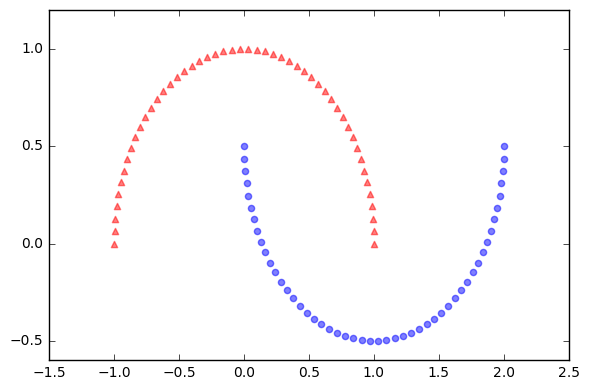

In [4]:
#分離できないデータを展開して線形分離器に適した入力にする。
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

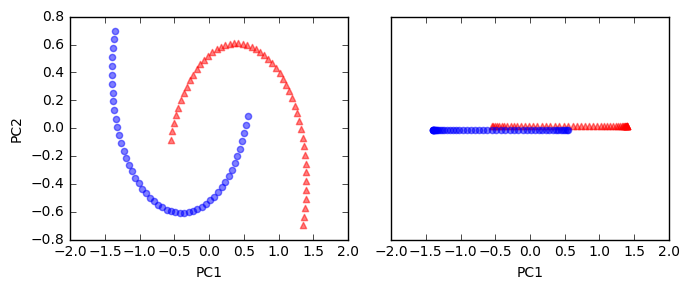

In [5]:
#sclearn標準のPCA(カーネルPCAでない)によりまず分離してみる。
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((50, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((50, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()

plt.show()
#このデータセットでは線形分離器は十分な性能を出すことができない。

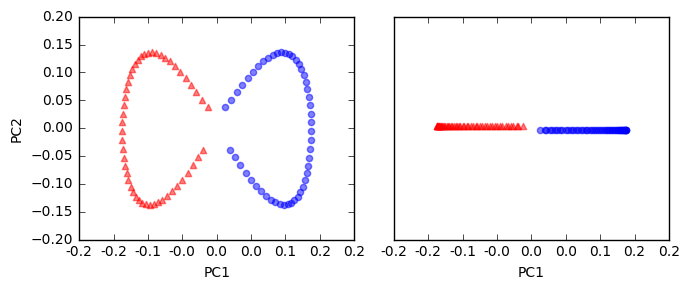

In [10]:
from matplotlib.ticker import FormatStrFormatter

X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], 
            color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
            color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02, 
            color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,
            color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

plt.tight_layout()

plt.show()

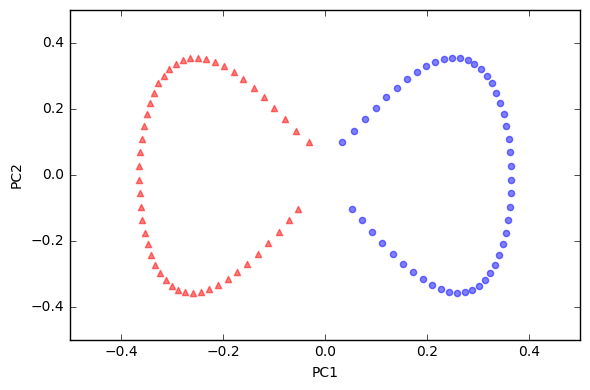

In [14]:
#scikit-learnのkernelPCAを使用する。
from sklearn.decomposition import KernelPCA

X, y = make_moons(n_samples = 100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel = 'rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.scatter(X_skernpca[y==0, 0], X_skernpca[y == 0, 1], color= 'red', marker='^', alpha=0.5)
plt.scatter(X_skernpca [y==1, 0],X_skernpca[y == 1, 1], color='blue', marker='o', alpha = 0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()